In [1]:
# import the dataset

import pandas as pd
import numpy as np

# Display all columns or rows

pd.set_option('display.max_columns',None)

# pd.set_option('display.max_rows',None)


df=pd.read_csv(r'./Global_Superstore2.csv', encoding='latin-1')

In [2]:
print(df)

       Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012        Same Day   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    Second Class   
2       25330    IN-2013-71249  17-10-2013  18-10-2013     First Class   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013     First Class   
4       47221     SG-2013-4320  05-11-2013  06-11-2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014        Same Day   
51286   35398   US-2014-102288  20-06-2014  24-06-2014  Standard Class   
51287   40470   US-2013-155768  02-12-2013  02-12-2013        Same Day   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012  Standard Class   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Cons

In [3]:
print(df['Customer Name'])

0             Rick Hansen
1           Justin Ritter
2            Craig Reiter
3        Katherine Murray
4             Rick Hansen
               ...       
51285     Katrina Edelman
51286    Zuschuss Carroll
51287      Laurel Beltran
51288          Ross Baird
51289       Mick Crebagga
Name: Customer Name, Length: 51290, dtype: object


In [ ]:
# Create 'gender' new variable from 'Customer Name' 

In [2]:
def add_gender_column(df):
    # Read male and female names from CSV files into DataFrames
    male_names_df = pd.read_csv('male.csv')
    female_names_df = pd.read_csv('female.csv')
    
    # Convert DataFrames to sets for faster lookup
    male_names_set = set(male_names_df['Column1'])
    female_names_set = set(female_names_df['Column1'])
    
    # Function to determine gender based on first name
    def get_gender(full_name):
        # Extract the first name from the full name
        first_name = full_name.split()[0]

        # Check if the first name is in the male or female names set
        if first_name in male_names_set:
            return 'M'
        elif first_name in female_names_set:
            return 'F'
        else:
            return 'Unknown'
        
            # Apply the function to 'Customer Name' column to create 'gender' column
    df['gender'] = df['Customer Name'].apply(get_gender)
    
    return df

In [3]:
new_df = add_gender_column(df)

In [4]:
print(new_df)

       Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012        Same Day   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    Second Class   
2       25330    IN-2013-71249  17-10-2013  18-10-2013     First Class   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013     First Class   
4       47221     SG-2013-4320  05-11-2013  06-11-2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014        Same Day   
51286   35398   US-2014-102288  20-06-2014  24-06-2014  Standard Class   
51287   40470   US-2013-155768  02-12-2013  02-12-2013        Same Day   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012  Standard Class   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Cons

In [17]:
print(new_df['gender'])

0              M
1              M
2              M
3              F
4              M
          ...   
51285          F
51286    Unknown
51287          F
51288          M
51289          M
Name: gender, Length: 51290, dtype: object


In [18]:
new_df['gender'].value_counts()

gender
M          31563
F          15314
Unknown     4413
Name: count, dtype: int64

In [ ]:
#Display information about the DataFrame 

new_df.info() 

In [5]:
#Display missing values (sum of each variable)

new_df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
gender                0
dtype: int64

In [4]:
new_df['Postal Code'].fillna(-1, inplace=True)
new_df['Postal Code']

0        10024.0
1           -1.0
2           -1.0
3           -1.0
4           -1.0
          ...   
51285       -1.0
51286    77095.0
51287    93030.0
51288       -1.0
51289       -1.0
Name: Postal Code, Length: 51290, dtype: float64

In [5]:
new_df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
gender                3
dtype: int64

In [ ]:
#display the categories from categorical variables

new_df['Sub-Category'].value_counts() 

In [ ]:
#Display basic descriptive statistics

new_df.describe() 

In [ ]:
new_df['Sales'].describe()

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Histogram for numerical columns

new_df.hist(bins=60, figsize=(10, 10)) 
plt.show()

In [ ]:
#Histogram for Sales

plt.hist(new_df['Sales'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram for Sales')

plt.show()

In [ ]:
#Scatterplot

plt.scatter(new_df['Profit'], new_df['Sales'], color='skyblue', marker='o')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.title('Scatterplot Sales-Profit')
plt.show()

In [ ]:
#Boxplot for Sales

sns.boxplot(y=new_df['Sales'])

plt.xlabel('Values')
plt.ylabel('Sales')
plt.title('Boxplot for Sales')
plt.show()

In [ ]:
#Boxplot Category-Discount

sns.boxplot(x='Category', y='Discount', data=new_df)
plt.show()

In [ ]:
# cross-tabulation (crosstab) to explore relationships between multiple categorical variables.

cross_tab = pd.crosstab(new_df['Category'], new_df['Country'])
print(cross_tab)

In [ ]:
# Calculate the frequency for categorical variables
# Frequency Sub-Category

frequency_counts = new_df['Sub-Category'].value_counts()

# Create a bar plot

frequency_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Sub-Categories')
plt.ylabel('Frequency')
plt.title('Frequency of Sub-Categories')
plt.show()

In [ ]:
#Frequency Ship Mode

frequency_counts = new_df['Ship Mode'].value_counts()

# Create a bar plot
frequency_counts.plot(kind='bar', color='purple')

plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.title('Frequency of Ship Mode')
plt.show()

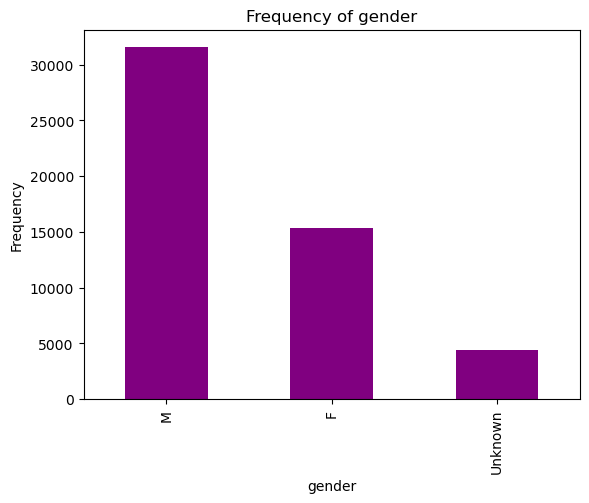

In [11]:
#Frequency gender

frequency_counts = new_df['gender'].value_counts()

# Create a bar plot
frequency_counts.plot(kind='bar', color='purple')

plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('Frequency of gender')
plt.show()

In [3]:
#OUTLIERS

#function to find outliers

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [4]:
outliers = find_outliers_IQR(df['Sales'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 5655
max outlier value: 22638.48
min outlier value: 581.55


0        2309.650
1        3709.395
2        5175.171
3        2892.510
4        2832.960
           ...   
44220    1585.710
45234     618.084
45351     936.270
47131     607.360
50402     772.470
Name: Sales, Length: 5655, dtype: float64

In [5]:
outliers = find_outliers_IQR(df['Profit'])

In [6]:
outliers = find_outliers_IQR(df['Quantity'])

In [7]:
outliers = find_outliers_IQR(df['Discount'])

In [8]:
outliers = find_outliers_IQR(df['Shipping Cost'])

In [9]:
outliers = find_outliers_IQR(df['Postal Code'])

In [10]:
#Replace outliers using imputation (mean value)

def impute_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()

   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,

       df.mean(),

       np.where(

           df < lower,

           df.mean(),

           df

           )

       )

   return df

In [11]:
df['Sales'] = impute_outliers_IQR(df['Sales'])
df.describe()['Sales']

count    51290.000000
mean       135.423121
std        130.085010
min          0.444000
25%         30.758625
50%         85.053000
75%        246.490581
max        581.400000
Name: Sales, dtype: float64

In [12]:
df['Profit'] = impute_outliers_IQR(df['Profit'])
df.describe()['Profit']

count    51290.000000
mean        16.153749
std         23.919615
min        -55.125000
25%          2.250000
50%         13.530000
75%         28.610982
max         91.995400
Name: Profit, dtype: float64

In [13]:
df['Quantity'] = impute_outliers_IQR(df['Quantity'])
df.describe()['Quantity']

count    51290.000000
mean         3.335737
std          1.993515
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: Quantity, dtype: float64

In [14]:
df['Discount'] = impute_outliers_IQR(df['Discount'])
df.describe()['Discount']

count    51290.000000
mean         0.101002
std          0.146265
min          0.000000
25%          0.000000
50%          0.000000
75%          0.170000
max          0.500000
Name: Discount, dtype: float64

In [15]:
df['Shipping Cost'] = impute_outliers_IQR(df['Shipping Cost'])
df.describe()['Shipping Cost']

count    51290.000000
mean        13.159525
std         13.010905
min          0.000000
25%          2.610000
50%          7.790000
75%         24.450000
max         57.200000
Name: Shipping Cost, dtype: float64

In [16]:
df['Postal Code'] = impute_outliers_IQR(df['Postal Code'])
df.describe()['Postal Code']

count    51290.000000
mean      2094.484925
std       4259.641952
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max      10753.194697
Name: Postal Code, dtype: float64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Boxplot for Sales without outliers

plt.boxplot(new_df['Sales'])
plt.ylabel('Sales')
plt.title('Boxplot for Sales')
plt.show()

In [ ]:
#Histogram for Profit

plt.hist(new_df['Profit'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram for Profit')

plt.show()

In [ ]:
sns.boxplot(x='Category', y='Sales', data=new_df)
plt.show()

In [ ]:
sns.boxplot(x='Category', y='Profit', data=new_df)
plt.show()

In [24]:
# Create a subset with numeric variables

numeric_df= new_df.select_dtypes(include=['number'])
print(numeric_df)

       Row ID   Postal Code       Sales  Quantity  Discount     Profit  \
0       32298  10753.194697  246.490581       7.0  0.000000  28.610982   
1       26341     -1.000000  246.490581       9.0  0.100000  28.610982   
2       25330     -1.000000  246.490581       9.0  0.100000  28.610982   
3       13524     -1.000000  246.490581       5.0  0.100000  28.610982   
4       47221     -1.000000  246.490581       8.0  0.000000  28.610982   
...       ...           ...         ...       ...       ...        ...   
51285   29002     -1.000000   65.100000       5.0  0.000000   4.500000   
51286   35398  10753.194697    0.444000       1.0  0.142908  -1.110000   
51287   40470  10753.194697   22.920000       3.0  0.000000  11.230800   
51288    9596     -1.000000   13.440000       2.0  0.000000   2.400000   
51289    6147     -1.000000   61.380000       3.0  0.000000   1.800000   

       Shipping Cost  
0          26.375915  
1          26.375915  
2          26.375915  
3          26.37591

In [25]:
#Correlation matrix for numeric variables
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000     0.353787 -0.100324 -0.198725 -0.122522 -0.035373   
Postal Code    0.353787     1.000000 -0.072422  0.077772  0.019722 -0.011370   
Sales         -0.100324    -0.072422  1.000000  0.290826 -0.036446  0.466698   
Quantity      -0.198725     0.077772  0.290826  1.000000  0.052696  0.189321   
Discount      -0.122522     0.019722 -0.036446  0.052696  1.000000 -0.348197   
Profit        -0.035373    -0.011370  0.466698  0.189321 -0.348197  1.000000   
Shipping Cost -0.094690    -0.069358  0.787346  0.282274 -0.038382  0.431919   

               Shipping Cost  
Row ID             -0.094690  
Postal Code        -0.069358  
Sales               0.787346  
Quantity            0.282274  
Discount           -0.038382  
Profit              0.431919  
Shipping Cost       1.000000  


In [ ]:
#Correlation with heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Create a scatterplot matrix

sns.pairplot(numeric_df)
plt.show()

In [26]:
from scipy.stats import chi2_contingency 

# Function for Chi square test for categorical variables with a=0.05


def is_correlated (x,y):
   data =pd.crosstab (new_df[x],new_df[y])
   chi2_result = chi2_contingency(data,)
   p, x= chi2_result[1], "Correlated" if chi2_result[1] < 0.05 else "Not-Correlated"
   return p,x

In [27]:
is_correlated ('Category', 'Country')

(2.4763382236218627e-56, 'Correlated')

In [ ]:
is_correlated ('Category', 'City')

In [ ]:
is_correlated ('Sub-Category', 'Ship Mode')

In [ ]:
is_correlated ('Sub-Category', 'Country')

In [4]:
# Encode categorical variables using frequency,dummy and ordinal encoding 

#Frequency encoding for (City, State, Country, Market, Region, Sub-Category) variables

frequency = new_df['City'].value_counts(normalize=True)
new_df['City']= new_df['City'].map(frequency)

In [5]:
frequency = new_df['State'].value_counts(normalize=True)
new_df['State']= new_df['State'].map(frequency)

In [6]:
frequency = new_df['Market'].value_counts(normalize=True)
new_df['Market']= new_df['Market'].map(frequency)

In [7]:
frequency = new_df['Region'].value_counts(normalize=True)
new_df['Region']= new_df['Region'].map(frequency)

In [4]:
# Ordinal encoding for (order priority) variable

from sklearn.preprocessing import OrdinalEncoder

order_of_categories = [['Low', 'Medium', 'High','Critical']]

# Create an instance of OrdinalEncoder with specified categories
ordinal_encoder = OrdinalEncoder(categories=order_of_categories)

# Fit and transform the 'Order Priority' column

new_df['Order_Priority_Encoded'] = ordinal_encoder.fit_transform(new_df[['Order Priority']]) + 1

print(new_df['Order_Priority_Encoded'])

0        4.0
1        4.0
2        2.0
3        2.0
4        4.0
        ... 
51285    2.0
51286    2.0
51287    3.0
51288    2.0
51289    3.0
Name: Order_Priority_Encoded, Length: 51290, dtype: float64


In [47]:
# One-hot encoding

encoded_data= pd.get_dummies(new_df, columns=['Ship Mode', 'Segment', 'Category','Sub-Category','Region','gender','Country'], dtype=int)

In [8]:
print(encoded_data)

       Row ID         Order ID  Order Date   Ship Date Customer ID  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012    RH-19495   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    JR-16210   
2       25330    IN-2013-71249  17-10-2013  18-10-2013    CR-12730   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013    KM-16375   
4       47221     SG-2013-4320  05-11-2013  06-11-2013     RH-9495   
...       ...              ...         ...         ...         ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014    KE-16420   
51286   35398   US-2014-102288  20-06-2014  24-06-2014    ZC-21910   
51287   40470   US-2013-155768  02-12-2013  02-12-2013    LB-16795   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012    RB-19795   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    MC-18100   

          Customer Name           City            State  Postal Code  Market  \
0           Rick Hansen  New York City         New York      10024.0      US   

In [48]:
encoded_data.drop(columns=['Row ID','Order ID','Ship Date','Postal Code','Product ID','Product Name','Order Priority','Customer Name','Customer ID','Order Date','Sales','Quantity','Discount','Profit','Shipping Cost','State','Market','City'], inplace=True)

In [49]:
print(encoded_data)

       Order_Priority_Encoded  Ship Mode_First Class  Ship Mode_Same Day  \
0                         4.0                      0                   1   
1                         4.0                      0                   0   
2                         2.0                      1                   0   
3                         2.0                      1                   0   
4                         4.0                      0                   1   
...                       ...                    ...                 ...   
51285                     2.0                      0                   1   
51286                     2.0                      0                   0   
51287                     3.0                      0                   1   
51288                     2.0                      0                   0   
51289                     3.0                      0                   0   

       Ship Mode_Second Class  Ship Mode_Standard Class  Segment_Consumer  \
0         

In [8]:
# PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [50]:
#Scaling

scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

In [48]:
print(scaled_data)

[[ 2.27519087 -0.41401175  4.24137516 ... -0.65243595  0.79057192
  -0.3068224 ]
 [ 2.27519087 -0.41401175 -0.23577259 ... -0.65243595  0.79057192
  -0.3068224 ]
 [-0.58360308  2.41539036 -0.23577259 ... -0.65243595  0.79057192
  -0.3068224 ]
 ...
 [ 0.84579389 -0.41401175  4.24137516 ...  1.5327175  -1.26490706
  -0.3068224 ]
 [-0.58360308 -0.41401175 -0.23577259 ... -0.65243595  0.79057192
  -0.3068224 ]
 [ 0.84579389 -0.41401175 -0.23577259 ... -0.65243595  0.79057192
  -0.3068224 ]]


In [51]:
# Perform PCA on the combined data

pca = PCA(n_components=3)  # Set the number of components as desired
pca_result = pca.fit_transform(scaled_data)

In [57]:
print(pca_result)

[[ 2.02128212 -2.47783929  2.66847566 ... -0.62629569  0.41849022
  -0.44903252]
 [ 2.16591135  2.30165639  2.7715483  ...  0.05434456 -0.18762711
  -1.51370737]
 [ 2.14464928 -2.53878995  1.41430225 ...  0.9736085  -0.70182902
   1.60738341]
 ...
 [-1.34220319  0.10738148  1.2898997  ... -1.95523047  0.9186254
   0.70957436]
 [-1.27260441  0.12212601 -1.1042012  ...  0.60505467 -1.35559909
   0.013715  ]
 [-1.30511497 -0.02519456  2.05129391 ...  1.63654054 -0.83448193
  -0.48333123]]


In [52]:
# Create a DataFrame for the PCA result

pca_df = pd.DataFrame(data=pca_result, columns=['PC1','PC2','PC3'])
print(pca_df)

            PC1       PC2       PC3
0      1.962466  1.483570 -2.390334
1      2.582405 -1.397726  2.579969
2      2.428741  2.855463  0.851813
3      1.699797  2.039588 -2.616664
4      1.495757  4.000128  0.314414
...         ...       ...       ...
51285 -0.860627 -0.123247  1.167272
51286 -1.289637 -0.726049 -1.847983
51287 -1.257497 -0.906720 -1.148475
51288 -1.231713 -0.641611 -0.305349
51289 -1.366038 -0.499670 -1.642508

[51290 rows x 3 columns]


In [13]:
# Try for elbow method

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Create a list to store the inertia values for different numbers of clusters
inertia = []

In [54]:
# Range of clusters to test
k_values = range(1, 10)

In [55]:
# Perform KMeans clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
    

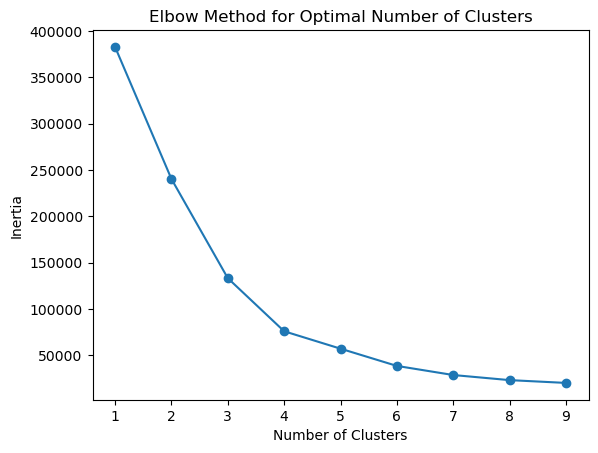

In [56]:
# Plot the inertia values against the number of clusters

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_values)
plt.show()

In [57]:
# inertia (sum distance): confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concave, will detect knees

from kneed import KneeLocator
inertia_knee_c3 = KneeLocator(
        x=range(1,10), 
        y=inertia, 
        S=0.1, curve="convex", direction="decreasing", online=True)

K_inertia_c3 = inertia_knee_c3.elbow   
print("elbow at k =", f'{K_inertia_c3:.0f} clusters')

elbow at k = 4 clusters


In [58]:
#Clustering
from sklearn.cluster import KMeans
# Combine PCA result with original data

combined_data = pd.concat([encoded_data, pd.DataFrame(pca_result, columns=['PC1', 'PC2','PC3'])], axis=1)

In [59]:
# Apply clustering algorithm k-means

kmeans = KMeans(n_clusters=4) 
clusters = kmeans.fit_predict(combined_data[['PC1', 'PC2','PC3']])

In [60]:
print(clusters)

[0 1 0 ... 2 2 2]


In [61]:
# Evaluate clustering

combined_data['Cluster'] = clusters
print(combined_data.head())

   Order_Priority_Encoded  Ship Mode_First Class  Ship Mode_Same Day  \
0                     4.0                      0                   1   
1                     4.0                      0                   0   
2                     2.0                      1                   0   
3                     2.0                      1                   0   
4                     4.0                      0                   1   

   Ship Mode_Second Class  Ship Mode_Standard Class  Segment_Consumer  \
0                       0                         0                 1   
1                       1                         0                 0   
2                       0                         0                 1   
3                       0                         0                 0   
4                       0                         0                 1   

   Segment_Corporate  Segment_Home Office  Category_Furniture  \
0                  0                    0                   0  

In [62]:
combined_data['Cluster'].value_counts()

Cluster
3    17188
2    14085
0    10141
1     9876
Name: count, dtype: int64

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

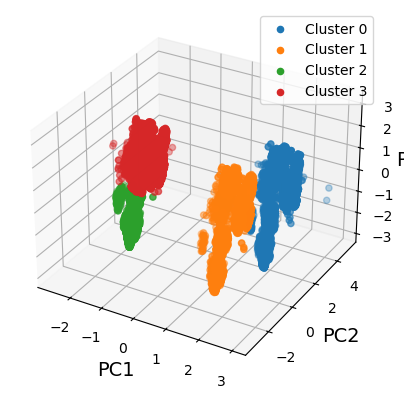

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cluster in combined_data['Cluster'].unique():
    ax.scatter(combined_data.loc[combined_data['Cluster'] == cluster, 'PC1'],
                combined_data.loc[combined_data['Cluster'] == cluster, 'PC2'],
                combined_data.loc[combined_data['Cluster'] == cluster, 'PC3'],
                label=f'Cluster {cluster}')
    
ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_zlabel("PC3", fontsize=14)

ax.legend()
plt.show()
    


In [64]:
combined_data.groupby(['Cluster']).sum()

,Order_Priority_Encoded,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Region_Africa,Region_Canada,Region_Caribbean,Region_Central,Region_Central Asia,Region_EMEA,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West,gender_F,gender_M,gender_Unknown,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Benin,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Brazil,Country_Bulgaria,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Cote d'Ivoire,Country_Croatia,Country_Cuba,Country_Czech Republic,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Finland,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Guadeloupe,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Haiti,Country_Honduras,Country_Hong Kong,Country_Hungary,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kyrgyzstan,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Lithuania,Country_Macedonia,Country_Madagascar,Country_Malaysia,Country_Mali,Country_Martinique,Country_Mauritania,Country_Mexico,Country_Moldova,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar (Burma),Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Norway,Country_Pakistan,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of the Congo,Country_Romania,Country_Russia,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syria,Country_Taiwan,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe,PC1,PC2,PC3
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24454.0,1476,518,2030,6117,5272,3051,1818,0,0,10141,3075,0,0,0,0,0,2223,0,0,0,0,1486,0,3357,0,0,0,911,65,341,2135,459,962,535,926,484,784,1271,669,599,2987,6251,903,12,4,34,21,79,0,633,61,6,1,34,7,12,20,7,8,4,327,13,0,11,24,65,2,0,32,393,74,22,4,160,8,80,14,1,142,10,87,141,1,1,1,1,10,553,1,5,399,30,1,117,3,4,16,146,4,13,354,280,121,67,21,24,207,4,52,7,19,15,3,3,4,4,6,10,0,12,48,9,2,

In [67]:
selected_variables = ['Sub-Category_Phones', 'Sub-Category_Chairs','Sub-Category_Binders','Sub-Category_Paper','Sub-Category_Storage','Sub-Category_Accessories','Sub-Category_Tables','Sub-Category_Bookcases']

In [65]:
selected_variables = ['Category_Technology', 'Category_Furniture', 'Category_Office Supplies']

In [66]:
combined_data.groupby(['Cluster'])[selected_variables].sum()

,Category_Technology,Category_Furniture,Category_Office Supplies
Cluster,,,
0,10141,0,0
1,0,9876,0
2,0,0,14085
3,0,0,17188


In [68]:
combined_data.groupby(['Cluster'])[selected_variables].sum()

,Sub-Category_Phones,Sub-Category_Chairs,Sub-Category_Binders,Sub-Category_Paper,Sub-Category_Storage,Sub-Category_Accessories,Sub-Category_Tables,Sub-Category_Bookcases
Cluster,,,,,,,,
0,3357,0,0,0,0,3075,0,0
1,0,3434,0,0,0,0,861,2411
2,0,0,3168,2110,2353,0,0,0
3,0,0,2984,1428,2706,0,0,0


In [69]:
selected_variables = ['Country_United States', 'Country_Australia', 'Country_France','Country_Italy','Country_Germany','Country_Japan','Country_Ireland','Country_Argentina','Country_United Kingdom','Country_Turkey']

In [70]:
combined_data.groupby(['Cluster'])[selected_variables].sum()

,Country_United States,Country_Australia,Country_France,Country_Italy,Country_Germany,Country_Japan,Country_Ireland,Country_Argentina,Country_United Kingdom,Country_Turkey
Cluster,,,,,,,,,,
0,1847,633,553,207,399,52,21,79,318,260
1,2121,596,420,155,318,55,13,91,224,213
2,6026,0,1854,623,1348,0,0,169,0,0
3,0,1608,0,123,0,143,72,51,1091,905


In [73]:
selected_variables = ['Region_Central','Region_EMEA']

In [74]:
combined_data.groupby(['Cluster'])[selected_variables].sum()

,Region_Central,Region_EMEA
Cluster,,
0,2135,962
1,2046,770
2,6936,19
3,0,3278


In [36]:
#stats of categorical data by mode

combined_data.groupby(['Cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['Category_Technology', 'Category_Furniture','Category_Office Supplies']]


,Category_Technology,Category_Furniture,Category_Office Supplies
Cluster,,,
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1


In [71]:
#stats of categorical data by mode

combined_data.groupby(['Cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['gender_M', 'gender_F','gender_Unknown']]


,gender_M,gender_F,gender_Unknown
Cluster,,,
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0


In [76]:
combined_data.groupby(['Cluster']).agg(lambda x: pd.Series.mode(x).iat[0])[['Order_Priority_Encoded']]

,Order_Priority_Encoded
Cluster,
0,2.0
1,2.0
2,2.0
3,2.0


In [39]:
import plotly.express as px
from pandas.plotting import parallel_coordinates

<Axes: >

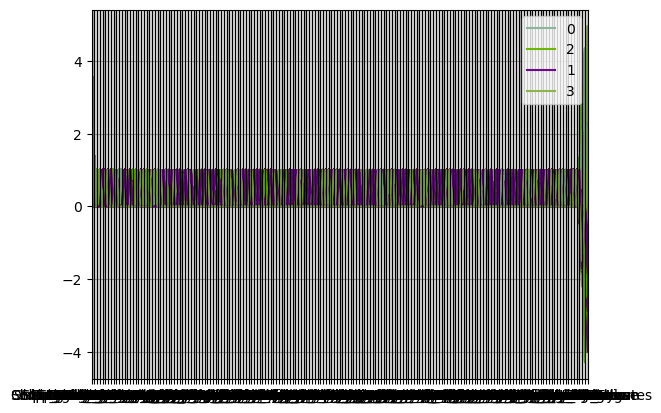

In [40]:
parallel_coordinates(combined_data,'Cluster')

In [41]:

fig = px.parallel_coordinates(combined_data, color='Cluster',
                              dimensions=['Category_Technology', 'Category_Furniture','Category_Office Supplies'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=4)
fig.show()

In [ ]:
# Classification with SVM 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import f1_score

In [91]:
X = combined_data[['gender_M','gender_F','gender_Unknown','Segment_Consumer','Segment_Corporate','Segment_Home Office','Ship Mode_First Class','Ship Mode_Second Class','Ship Mode_Same Day','Ship Mode_Standard Class','Category_Technology', 'Category_Furniture', 'Category_Office Supplies', 'Sub-Category_Chairs','Sub-Category_Binders','Sub-Category_Phones','Region_Central','Region_EMEA','Country_United States','Country_Australia']]
Y = combined_data['Cluster']

In [92]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [93]:
#RBF & POLYNOMIAL KERNEL

#POLYNOMIAL 

poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, Y_train)

In [94]:
poly_pred = poly.predict(X_test)

In [95]:
poly_accuracy = accuracy_score(Y_test, poly_pred)
poly_f1 = f1_score(Y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  95.05
F1 (Polynomial Kernel):  94.97


In [96]:
# RBF

rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, Y_train)

In [97]:
rbf_pred = rbf.predict(X_test)

In [98]:

rbf_accuracy = accuracy_score(Y_test, rbf_pred)
rbf_f1 = f1_score(Y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))


Accuracy (RBF Kernel):  95.05
F1 (RBF Kernel):  94.97


In [85]:
#Random Forest 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [99]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
 
# Train the classifier
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [100]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [101]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2063
           1       1.00      1.00      1.00      1960
           2       1.00      0.82      0.90      2769
           3       0.87      1.00      0.93      3466

    accuracy                           0.95     10258
   macro avg       0.97      0.95      0.96     10258
weighted avg       0.96      0.95      0.95     10258



In [102]:
feature_importance_rf = rf_classifier.feature_importances_

In [178]:
print(feature_importance_rf)

[1.75007762e-01 8.85869965e-02 2.37241378e-02 1.63364581e-04
 1.16687617e-04 8.56044907e-05 9.86725341e-05 9.14001078e-05
 1.11219992e-04 8.94283233e-05 8.10885104e-04 4.99500569e-03
 2.00681106e-01 1.34480650e-01 2.22004886e-01 1.23435993e-01
 6.14727903e-03 1.93689208e-02]


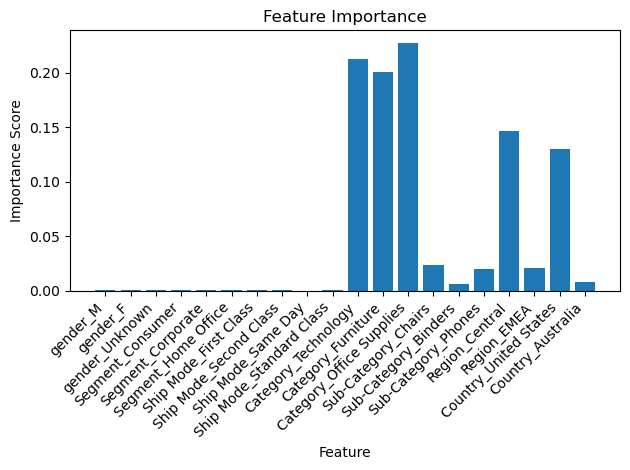

In [103]:
import matplotlib.pyplot as plt

plt.bar(range(len(feature_importance_rf)), feature_importance_rf, align='center')
plt.xticks(range(len(feature_importance_rf)), X, rotation=45, ha='right')  
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.tight_layout()  
plt.show()